# Decision tree model

## Assessing the predictive ability of a decision tree model
Using a training and testing split of the DCD and DBD datasets to fit and assess the predictive ability of a decision tree model

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.metrics as mets
%matplotlib inline

In [5]:
#Read in dataset with all rows included
df = pd.read_sas("Data/alldata3.sas7bdat")

#6931 DBD apps
dbd_apps = df[(df["eli_DBD"]==1)&(df["FAMILY_APPROACHED"]==2)]

#6060 DBD apps to match cohort in paper
dbd_apps = dbd_apps[(dbd_apps["eth_grp"]!=5)&(dbd_apps["FORMAL_APR_WHEN"]!=4)&(dbd_apps["donation_mentioned"]!=-1)
                    &(dbd_apps["FAMILY_WITNESS_BSDT"]!=9)&(dbd_apps["GENDER"]!=9)]
     
#9965 DCD apps
dcd_apps = df[(df["eli_DCD"]==1)&(df["FAMILY_APPROACHED"]==2)]

#9405 DCD apps to match cohort in paper
dcd_apps = dcd_apps[(dcd_apps["GENDER"]!=9)&(dcd_apps["cod_neuro"].notna())&(dcd_apps["eth_grp"]!=5)&(dcd_apps["donation_mentioned"]!=-1)&
                    (~dcd_apps["DTC_WD_TRTMENT_PRESENT"].isin([8,9]))]

# Columns used to create DBD model in paper
dbd_cols = ["wish", "FORMAL_APR_WHEN", "donation_mentioned", "app_nature", "eth_grp", "religion_grp", "GENDER", "FAMILY_WITNESS_BSDT", "DTC_PRESENT_BSD_CONV", 
            "acorn_new", "adult","FAMILY_CONSENT"]

dbd_apps[dbd_cols].astype(int)

dbd_model_data = dbd_apps[dbd_cols]
dbd_model_data2 = pd.get_dummies(data=dbd_model_data,columns=dbd_cols[:-1],drop_first=True)

dbd_features = dbd_model_data2.drop("FAMILY_CONSENT",axis=1)
dbd_consents = dbd_model_data2["FAMILY_CONSENT"]

# Columns used to create DCD model in paper
dcd_cols = ["wish", "donation_mentioned", 
            "app_nature", "eth_grp", "religion_grp", "GENDER", "DTC_WD_TRTMENT_PRESENT", 
            "acorn_new", "adult","cod_neuro","FAMILY_CONSENT"]

dcd_apps[dbd_cols].astype(int)

dcd_model_data = dcd_apps[dcd_cols]
dcd_model_data2 = pd.get_dummies(data=dcd_model_data,columns=dcd_cols[:-1],drop_first=True)

dcd_features = dcd_model_data2.drop("FAMILY_CONSENT",axis=1)
dcd_consents = dcd_model_data2["FAMILY_CONSENT"]

# creating a train and testing dataset for DBD and DCD approaches

# 1382 consents, 618 non-consents in test data
DBD_X_train, DBD_X_test, DBD_y_train, DBD_y_test = train_test_split(dbd_features,dbd_consents, test_size=0.33, random_state=10)

# 1865 consents, 1239 non-consents in t
DCD_X_train, DCD_X_test, DCD_y_train, DCD_y_test = train_test_split(dcd_features,dcd_consents, test_size=0.33, random_state=10)

/Users/roddy.jacques/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")
/Users/roddy.jacques/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sas/sas7bdat.py:809: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._string_chunk[js, :]


In [41]:
# fitting tree to training data 
tree_model = DecisionTreeClassifier(max_depth=20)

In [42]:
DBD_tree = tree_model.fit(DBD_X_train,DBD_y_train)

DBD_preds = DBD_tree.predict(DBD_X_test)

mets.confusion_matrix(DBD_y_test, DBD_preds)

array([[ 271,  347],
       [ 263, 1119]])

In [43]:
# classification report for DBD model
print(mets.classification_report(DBD_y_test, DBD_preds))

print("Cohen kappa: " + str(round(mets.cohen_kappa_score(DBD_y_test, DBD_preds),2)))

print("Balanced accuracy: " + str(round(mets.balanced_accuracy_score(DBD_y_test, DBD_preds),2)))

print("Accuracy: " + str(round(mets.accuracy_score(DBD_y_test, DBD_preds),2)))

              precision    recall  f1-score   support

         1.0       0.51      0.44      0.47       618
         2.0       0.76      0.81      0.79      1382

    accuracy                           0.69      2000
   macro avg       0.64      0.62      0.63      2000
weighted avg       0.68      0.69      0.69      2000

Cohen kappa: 0.26
Balanced accuracy: 0.62
Accuracy: 0.7


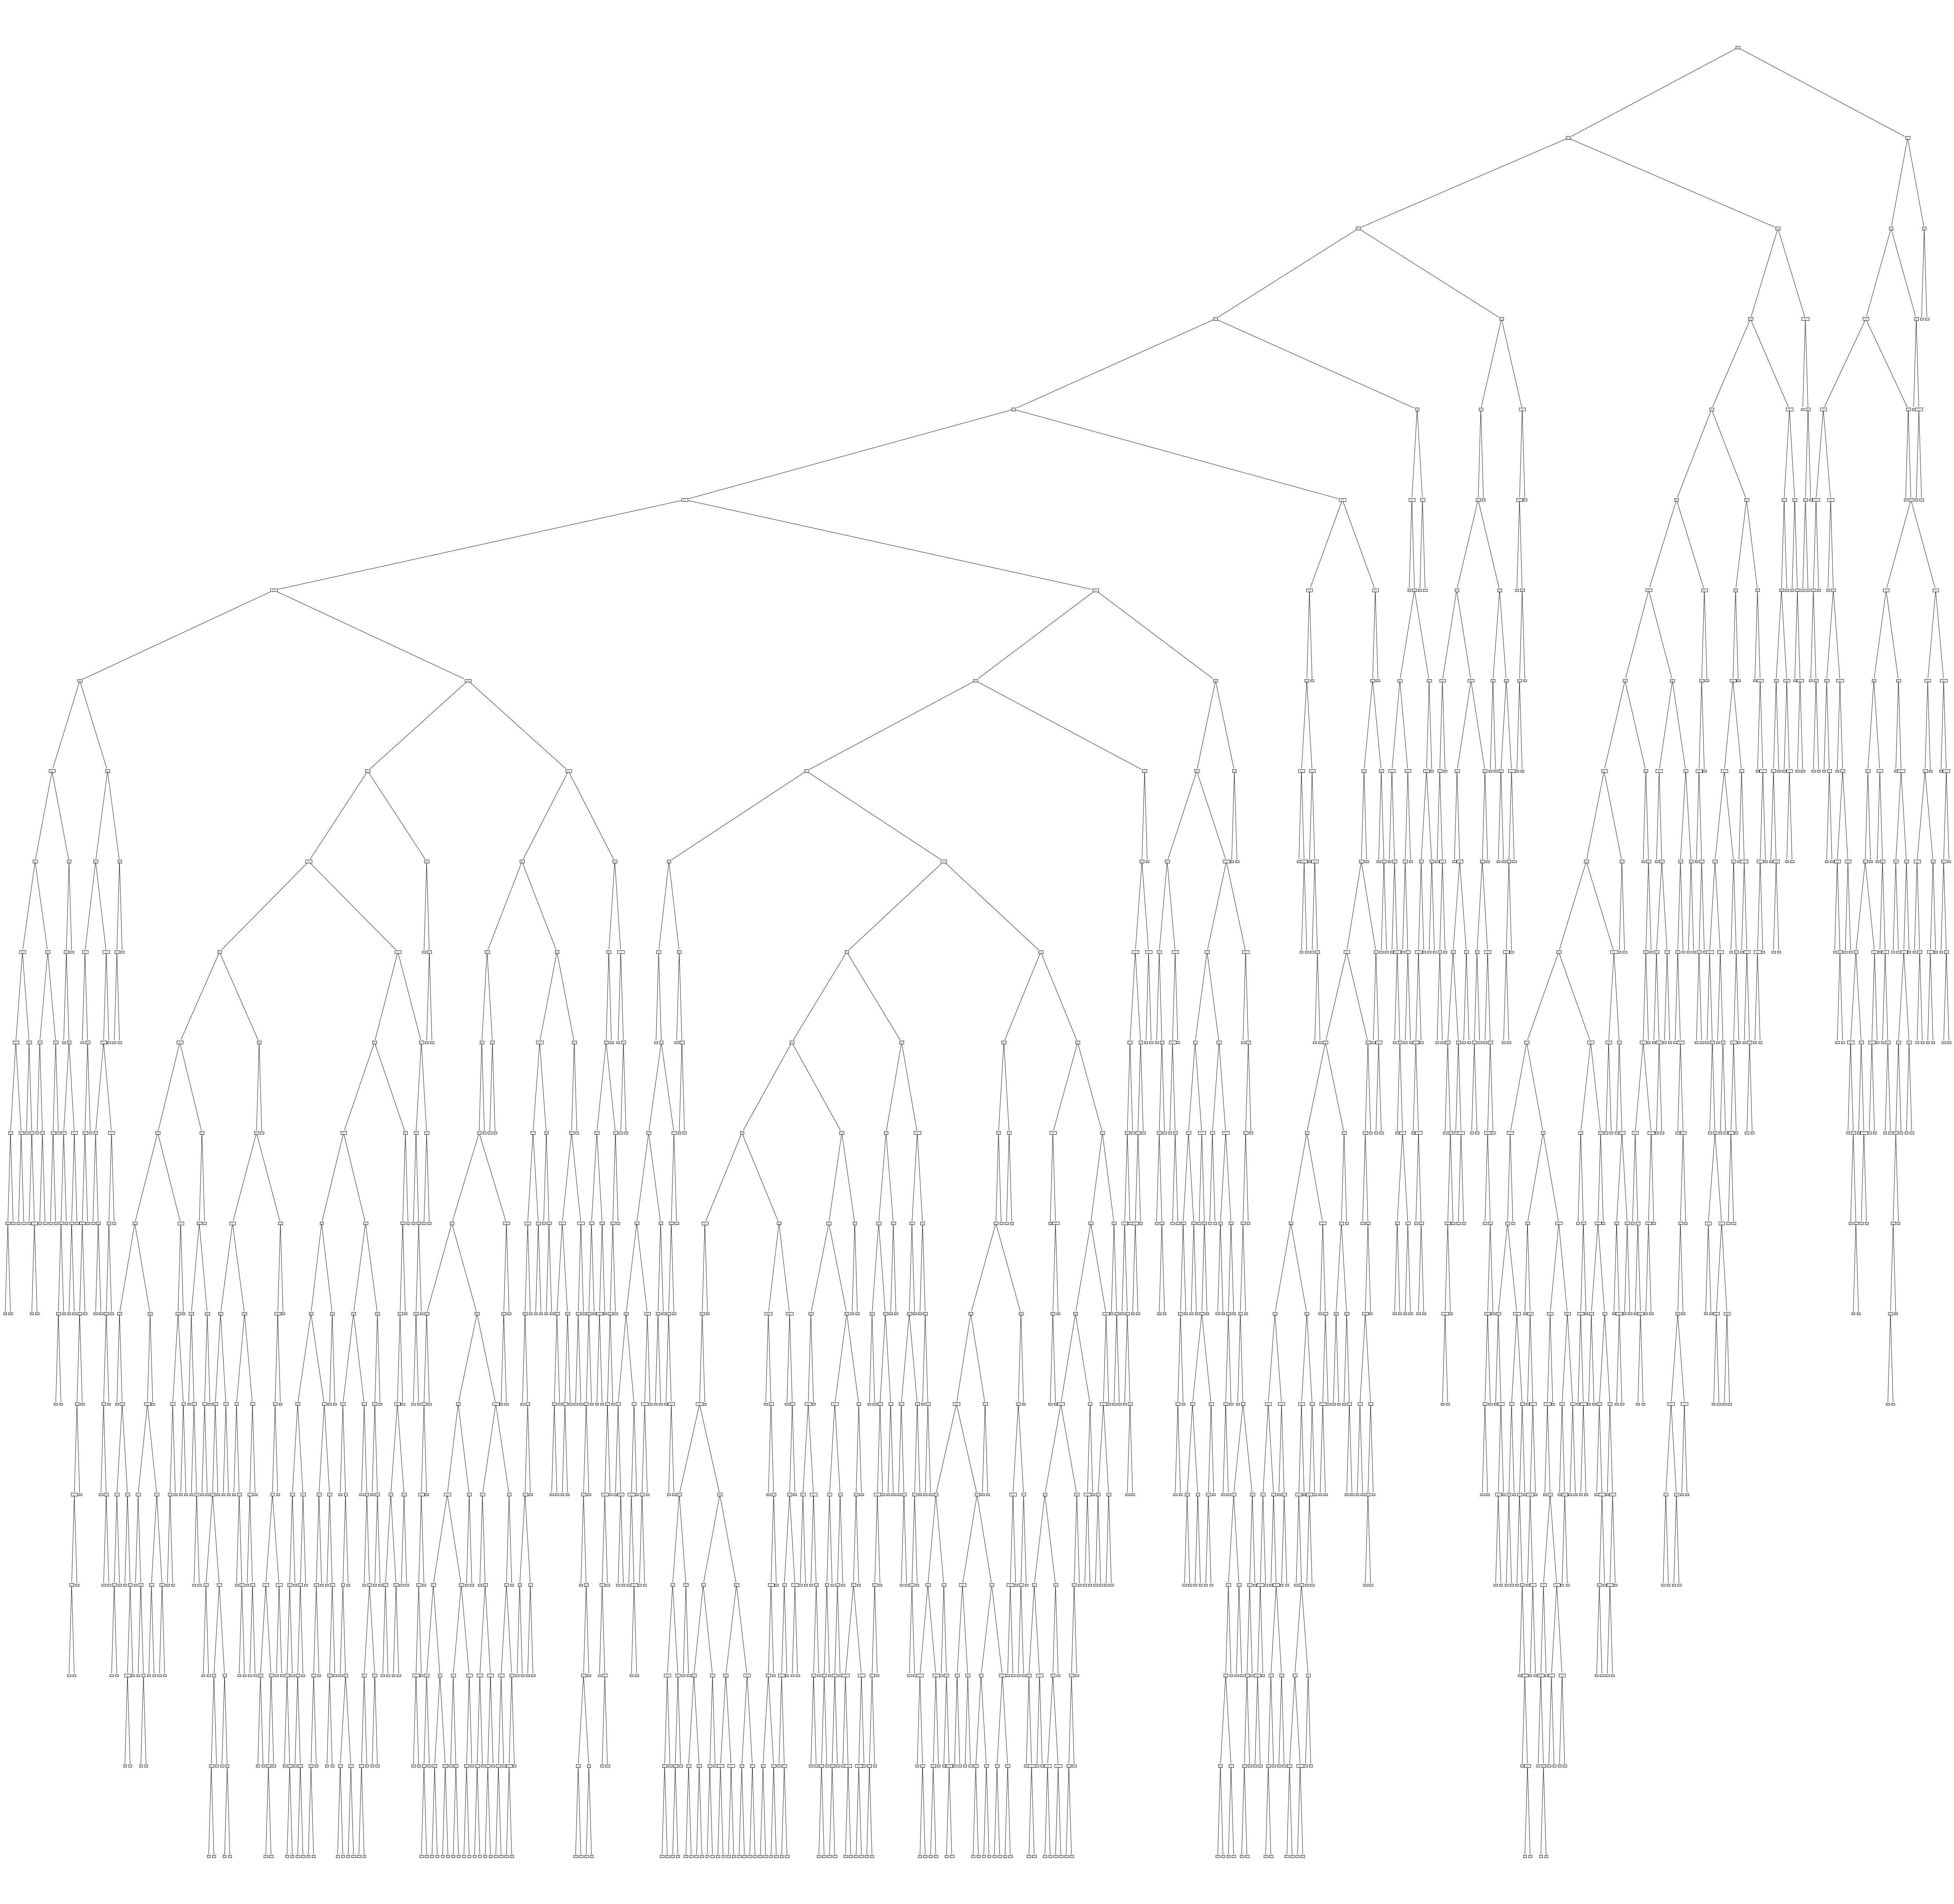

In [44]:
fig,ax = plt.subplots(1,1,figsize=[100,100])
plot_tree(DBD_tree,feature_names=dbd_features.columns,class_names=["Non-consent","Consent"])
plt.show()

In [9]:
DCD_tree = tree_model.fit(DCD_X_train,DCD_y_train)

DCD_preds = DCD_tree.predict(DCD_X_test)

mets.confusion_matrix(DCD_y_test, DCD_preds)

array([[ 820,  419],
       [ 572, 1293]])

In [10]:
# classification report for DCD model
print(mets.classification_report(DCD_y_test, DCD_preds))

print("Cohen kappa: " + str(round(mets.cohen_kappa_score(DCD_y_test, DCD_preds),2)))

print("Balanced accuracy: " + str(round(mets.balanced_accuracy_score(DCD_y_test, DCD_preds),2)))

print("Accuracy: " + str(round(mets.accuracy_score(DCD_y_test, DCD_preds),2)))

              precision    recall  f1-score   support

         1.0       0.59      0.66      0.62      1239
         2.0       0.76      0.69      0.72      1865

    accuracy                           0.68      3104
   macro avg       0.67      0.68      0.67      3104
weighted avg       0.69      0.68      0.68      3104

Cohen kappa: 0.35
Balanced accuracy: 0.68
Accuracy: 0.68


[Text(278.9565427358283, 213.41333333333333, 'X[2] <= 0.5\ngini = 0.48\nsamples = 6301\nvalue = [2521, 3780]'),
 Text(235.86181895769965, 205.36, 'X[8] <= 0.5\ngini = 0.498\nsamples = 5268\nvalue = [2467, 2801]'),
 Text(186.78911009470892, 197.30666666666667, 'X[1] <= 0.5\ngini = 0.483\nsamples = 4349\nvalue = [1768, 2581]'),
 Text(162.56282658458088, 189.25333333333333, 'X[0] <= 0.5\ngini = 0.498\nsamples = 3500\nvalue = [1645, 1855]'),
 Text(147.30105270037842, 181.2, 'X[12] <= 0.5\ngini = 0.5\nsamples = 3278\nvalue = [1627, 1651]'),
 Text(125.382927902355, 173.14666666666668, 'X[6] <= 0.5\ngini = 0.5\nsamples = 3195\nvalue = [1550, 1645]'),
 Text(94.96966117307775, 165.09333333333333, 'X[4] <= 0.5\ngini = 0.5\nsamples = 2893\nvalue = [1460, 1433]'),
 Text(67.75095503047258, 157.04, 'X[3] <= 0.5\ngini = 0.498\nsamples = 2321\nvalue = [1230, 1091]'),
 Text(45.13939541146721, 148.98666666666668, 'X[18] <= 0.5\ngini = 0.497\nsamples = 2095\nvalue = [1135, 960]'),
 Text(24.78685076177285

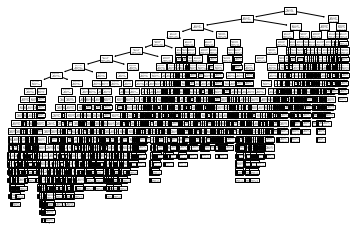

In [14]:
plot_tree(DCD_tree)